In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler
import re

In [2]:
df = pd.read_csv('../data/data_raw.csv')

In [3]:
df['word_count'] = df['features'].apply(lambda x: len(x.split()))
df['unique_word_count'] = df['features'].apply(lambda x: len(set(x.split())))
df['char_count'] = df['features'].apply(lambda x: len(x))
df['avg_word_length'] = df['features'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df['contains_sudoku'] = df['features'].apply(lambda x: 1 if 'sudoku' in x.lower() else 0)
df['contains_digits'] = df['features'].apply(lambda x: 1 if any(char.isdigit() for char in x) else 0)
df['contains_normal'] = df['features'].apply(lambda x: 1 if 'normal' in x.lower() else 0)

In [4]:
vectorizer = TfidfVectorizer(max_features=15000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(df['features']).toarray()

In [5]:
text_features = df[['word_count', 'unique_word_count', 'char_count', 'avg_word_length', 'contains_sudoku','contains_digits','contains_normal']].values
X_features = np.concatenate([X_tfidf, text_features], axis=1)

In [6]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

In [7]:
df['target'] = df['target'].replace({1: 1, 2: 1, 3: 2, 4: 3, 5: 3})
y = df['target'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [10]:
X_train = np.abs(X_train)
X_test = np.abs(X_test)

In [11]:
nb_classifier = MultinomialNB(alpha=1)
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.60      0.57       676
           2       0.41      0.45      0.43       691
           3       0.55      0.44      0.49       633

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



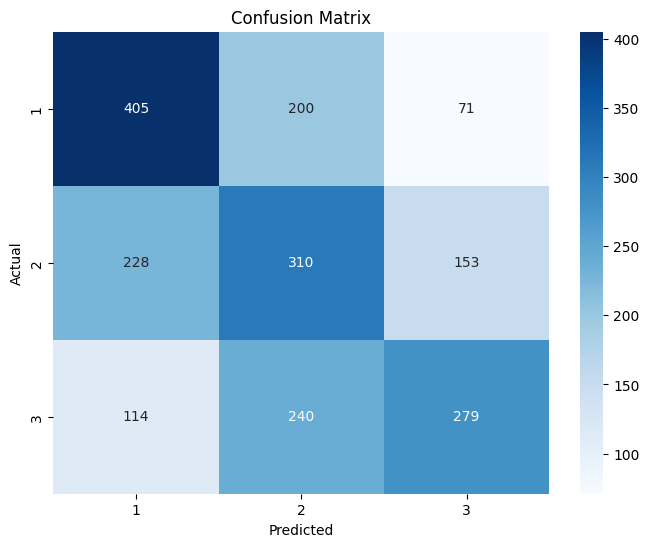

In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()